# Linear Regression with Python Scikit Learn

## DOMAIN: Data Science & Analytics (GRIP May-21)

## Task - 1: Prediction using Supervised ML 

##### Predict the percentage of an student based on the no. of study hours. 



## Name: Hammad Ali
### Punjab University College of Information and Technology

In [156]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [175]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


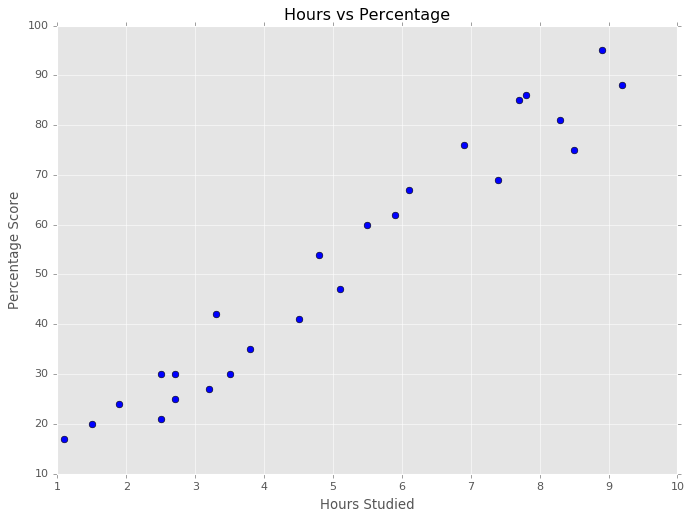

In [158]:
# Plotting the distribution of scores
def plot(title="Hours vs Percentage"):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 7))
    plt.plot(s_data.Hours, s_data.Scores, 'bo', )
    # s_data.plot(x='Hours', y='Scores', style='o')  
    plt.title(title)  
    plt.xlabel('Hours Studied')  
    plt.ylabel('Percentage Score')  
    plt.grid(True)
plot()

# Preparing the Data

In [159]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Linear Regression

In [160]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

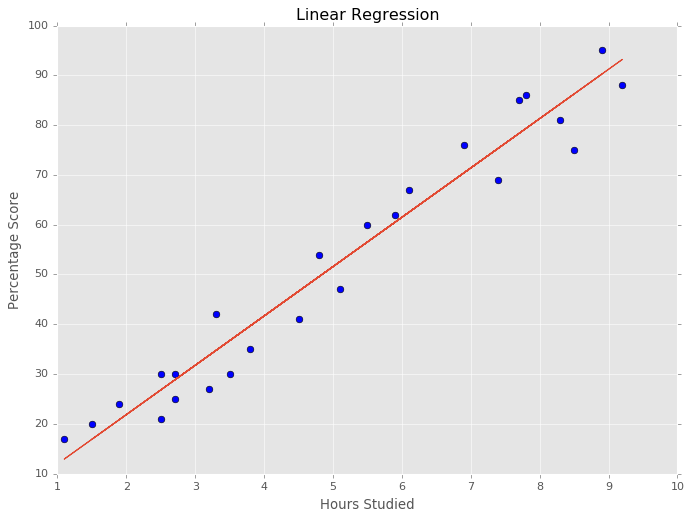

In [161]:
line = linear_regressor.coef_*X + linear_regressor.intercept_
plot(title="Linear Regression")
plt.plot(X, line);
plt.show()

In [162]:
mean_absolute_error(y_test, linear_regressor.predict(X_test))

4.183859899002975

# Lasso Regression

In [163]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

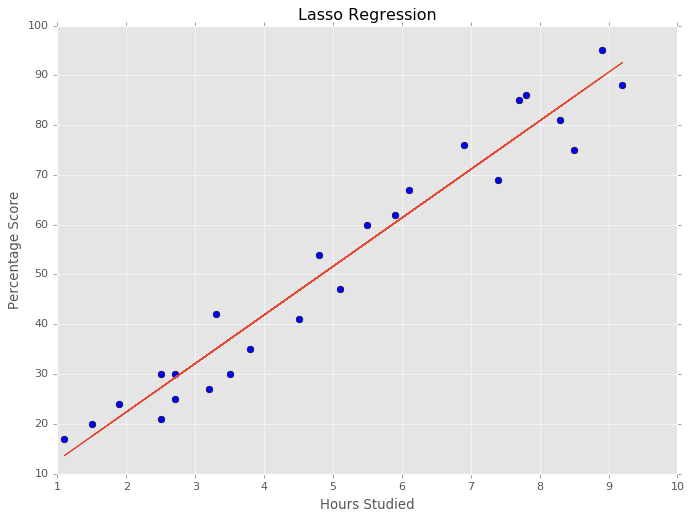

In [164]:
line = lasso_regressor.coef_*X + lasso_regressor.intercept_
plot(title="Lasso Regression")
plt.plot(X, line);
plt.show()

In [165]:
mean_absolute_error(y_test, lasso_regressor.predict(X_test))

3.9915771073417075

#  Ridge Regression

In [166]:
ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

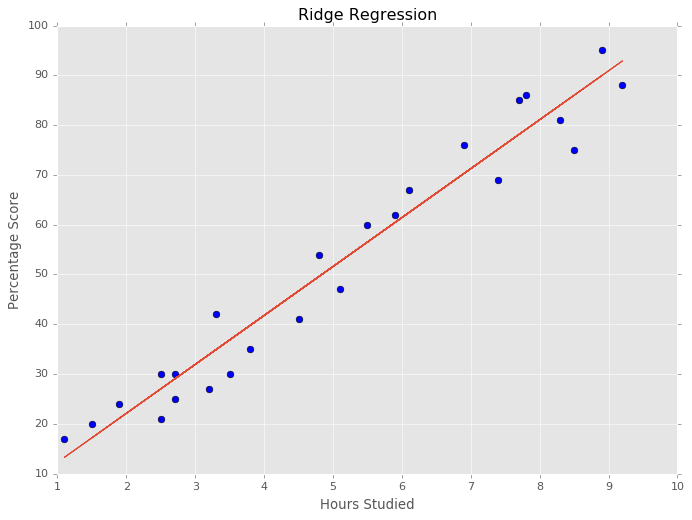

In [167]:
line = ridge_regression.coef_*X + ridge_regression.intercept_
plot(title="Ridge Regression")
plt.plot(X, line);
plt.show()

In [168]:
mean_absolute_error(y_test, ridge_regression.predict(X_test))

4.089342367221116

#  One Plot For All Regressions

In [169]:
linear = linear_regressor.coef_*X + linear_regressor.intercept_
lasso = lasso_regressor.coef_*X + lasso_regressor.intercept_
ridge = ridge_regression.coef_*X + ridge_regression.intercept_

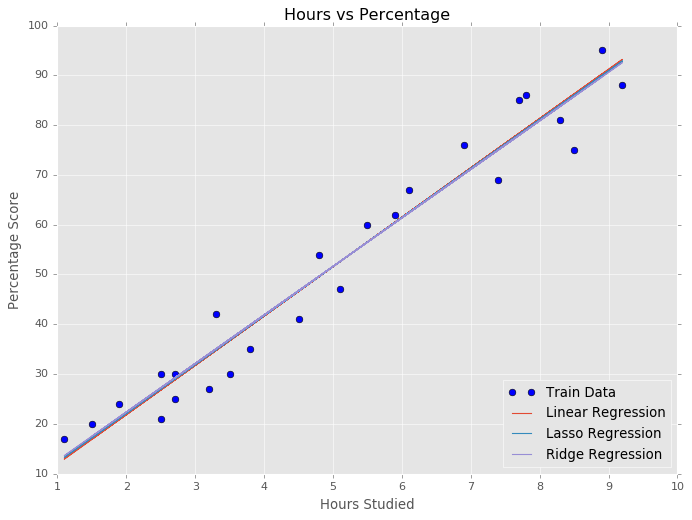

In [170]:
plot()
plt.plot(X, linear)
plt.plot(X, ridge)
plt.plot(X, lasso)
plt.legend(['Train Data', 'Linear Regression', 'Lasso Regression', 'Ridge Regression'], loc=4)

# Predictions

#### We will use Lasso Regression as that has lowest Mean Absolute Error

In [171]:
print(X_test) # Testing data - In Hours
y_pred = lasso_regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [172]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.489479
1,27,34.062443
2,69,75.007413
3,30,27.238282
4,62,60.384210


# Prediction for score 9.25 hours a day

In [180]:
hours = 9.25
own_pred = lasso_regressor.predict(np.asarray(hours).reshape(-1, 1))
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.04269713841771
